** Etivity 2**

**Student Name:** Ganapathy

**Student ID: **18202799

Good reference documentation in pandas site:
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns
from google.colab import files

**Task 1 Fill in the Missing Values**

First I will locate the missing values. Then decide after seom profiling the best moethod to fill in the missing data. Removal of records or attributes coudl also be an option.

In [2]:
uploaded = files.upload()

Saving bank_et2.csv to bank_et2.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['bank_et2.csv']))

In [4]:
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [0]:
count_NaN = len(df) - df.count()

age           12
job           10
education    104
contact      191
poutcome     454
dtype: int64


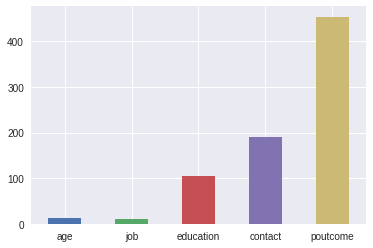

In [8]:
empy_NaN = count_NaN[count_NaN!=0]

print(empy_NaN)

empy_NaN.index.tolist()
empy_NaN.plot.bar(rot=0)
plt.show()

So we have 800 missing / blank records. 

age                 12 Missing

job                  10 Missing

education    104 Missing

contact         191 Missing

poutcome    454 Missing


We must understand the types and ranges of these values for each attribute to replace with values. 

Replacement

We can check, using correlation, which attributes inform us about the missing value and impute a suitable one

In [9]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [10]:
#Lets analyse the null values
df[df['age'].isnull()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


*   Mostly customers age is missing if they use Cellular as contact type.

We can attribute "age" can be related to the attributes "education" and "contact" status.





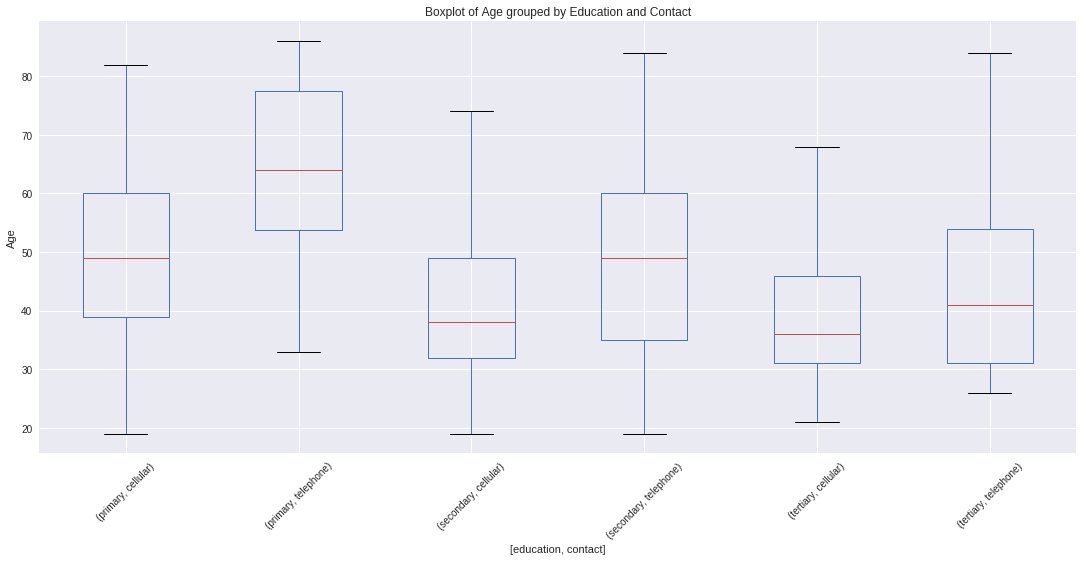

In [11]:
df.boxplot(column='age', by=['education', 'contact'], rot=45, figsize=(18,8))

plt.title("Boxplot of Age grouped by Education and Contact")
plt.ylabel("Age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.show()

Identify Missing values & filling 

In [12]:
df['education'].value_counts

<bound method IndexOpsMixin.value_counts of 0        tertiary
1       secondary
2       secondary
3       secondary
4       secondary
5        tertiary
6       secondary
7       secondary
8        tertiary
9        tertiary
10            NaN
11      secondary
12      secondary
13      secondary
14      secondary
15            NaN
16      secondary
17       tertiary
18      secondary
19       tertiary
20       tertiary
21       tertiary
22        primary
23        primary
24       tertiary
25       tertiary
26      secondary
27        primary
28        primary
29      secondary
          ...    
1970     tertiary
1971    secondary
1972          NaN
1973    secondary
1974    secondary
1975     tertiary
1976     tertiary
1977      primary
1978    secondary
1979     tertiary
1980     tertiary
1981    secondary
1982     tertiary
1983    secondary
1984     tertiary
1985          NaN
1986     tertiary
1987    secondary
1988    secondary
1989      primary
1990     tertiary
1991    secondary
19

In [13]:
df[df['education'].isnull()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
10,10,38.0,management,single,NaN,no,715,1.079459,-1.642914,yes,no,cellular,2,apr,951,1,132,3,failure,no
15,15,38.0,blue-collar,married,NaN,no,0,0.606796,0.583824,yes,no,cellular,2,apr,477,2,267,1,failure,no
124,124,39.0,blue-collar,married,NaN,no,0,0.193043,-0.140199,no,no,cellular,2,feb,731,1,193,3,failure,no
209,209,37.0,management,married,NaN,no,247,-0.636695,-0.828058,no,no,cellular,2,feb,192,2,208,1,failure,no
257,257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
262,262,31.0,blue-collar,married,NaN,no,-120,0.865080,0.071962,yes,no,cellular,3,feb,100,3,201,2,failure,no
285,285,51.0,technician,divorced,NaN,no,1328,0.078528,-1.931680,yes,no,cellular,4,feb,119,1,251,1,failure,no
324,324,41.0,blue-collar,married,NaN,no,402,-0.358492,0.388384,yes,no,cellular,4,feb,604,1,204,2,failure,no
348,348,56.0,admin.,married,NaN,no,1848,1.265816,-0.039394,yes,no,cellular,4,feb,147,2,260,1,failure,no
381,381,43.0,management,married,NaN,no,587,1.053251,0.993957,yes,no,cellular,5,feb,11,6,231,9,failure,no


### 

---



In [0]:
#Under education attribute we have 104 missing valueswhich can drop it.
df.dropna(subset=['education'], inplace=True)

# Reset the index of rows
df.reset_index(drop=True, inplace=True)

In [15]:
# create a pivot table, which contains the median values for all the education and  contact groups.
pivot = df.pivot_table(values='age', 
                       index='education', 
                       columns='contact', 
                       aggfunc=np.median)
print(pivot)

contact    cellular  telephone
education                     
primary        49.0       64.0
secondary      38.0       49.0
tertiary       36.0       41.0


In [0]:
# Define function to return an element of the pivot table
def func_column(x):
  #target_columns = ['age', 'job', 'education', 'contact', 'poutcome']
  #if x in target_columns:
  #  table = pivot.loc[x['education'], x['contact']]   
  return pivot.loc[x['education'], x['contact']]

In [0]:
# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(func_column, axis=1), inplace=True)  

In [18]:
df['age'].isnull().sum()

0

##Handling missing values for Education

In [19]:
# Working on missing values for attribute 
df['poutcome'].isnull().sum()

424

After removing the missing job samples we are left with 424 missing education fields from the previous 454, as there were some overlap in the missing values between the 2 attributes

In [20]:
df['poutcome'].isnull().sum()

424

In [21]:
df.loc[df['poutcome'].isnull(), 'poutcome'] = "unknown"
df.poutcome.unique()

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [22]:
print(df.isnull().sum())


Unnamed: 0        0
age               0
job               5
marital           0
education         0
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         182
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64


In [0]:
#Under poutcome attribute we have 104 missing valueswhich can drop it.
df.dropna(subset=['job'], inplace=True)

# Reset the index of rows
df.reset_index(drop=True, inplace=True)

In [24]:
# Check for null values
print(df.isnull().sum())
print(df.shape)

Unnamed: 0        0
age               0
job               0
marital           0
education         0
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         181
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64
(1891, 20)


In [0]:
df['poutcome'].fillna('poutcome', inplace=True) 

In [26]:
df.isnull().sum()

Unnamed: 0        0
age               0
job               0
marital           0
education         0
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         181
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64

##Handling missing values for Contact

In [0]:
df['contact'].fillna('contact', inplace=True) 

In [28]:
# Check for null values
print(df.isnull().sum())
print(df.shape)

Unnamed: 0      0
age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64
(1891, 20)


We have a blank dataframe with 1891 rows and 20 columns once missing values are handled

##Task 2 (CS5062)
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [29]:
df = df.drop(['Unnamed: 0'], axis=1)
df.describe(include=[np.number])

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,41.557906,1414.141195,0.249144,0.476720,13.847171,291.112639,1.911158,169.012692,2.586991
std,12.464052,3192.053007,0.820140,1.071293,9.732421,222.696589,1.384547,131.643871,3.439149
min,19.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,197.000000,-0.300751,-0.294425,5.000000,144.500000,1.000000,84.000000,1.000000
50%,38.000000,536.000000,0.230221,0.483995,12.000000,234.000000,1.000000,182.000000,2.000000
75%,49.000000,1623.000000,0.812081,1.201529,23.000000,377.500000,2.000000,251.500000,3.000000
max,86.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


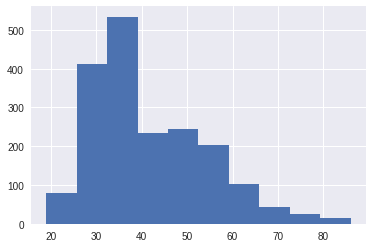

In [30]:
df['age'].hist()

In [31]:
df.boxplot(return_type='age')

ValueError: ignored

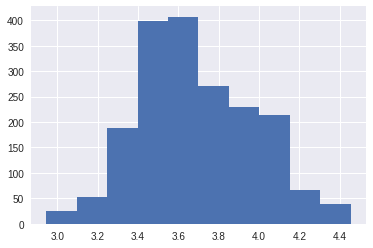

In [32]:
 # Use a log transformation to decrease the impact of extreme values in column age
df['age_log'] = np.log(df['age'])
df['age_log'].hist()

The histograms show that both age_log have distribution closer to normal age

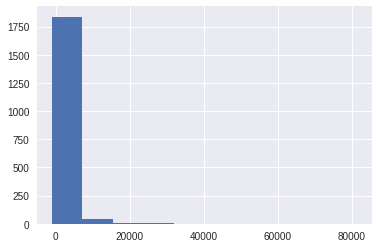

In [33]:
df["balance"].hist()

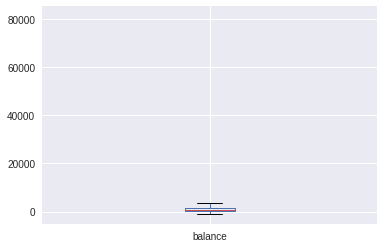

In [36]:
df.boxplot(column='balance')

In [37]:
 # While struggling, I found this option from Abhijit code which was very helpful
  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
# Since negative values are present the Yeo-Johnson transformed is to be preferred.

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pt.fit(df['balance'].values.reshape(-1, 1))

print(pt.lambdas_)

df['balance_power'] = pt.transform(df['balance'].values.reshape(-1, 1))

[0.78198683]


Outlier detection in balance

In [39]:
df.balance.describe()

count     1891.000000
mean      1414.141195
std       3192.053007
min       -980.000000
25%        197.000000
50%        536.000000
75%       1623.000000
max      81204.000000
Name: balance, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


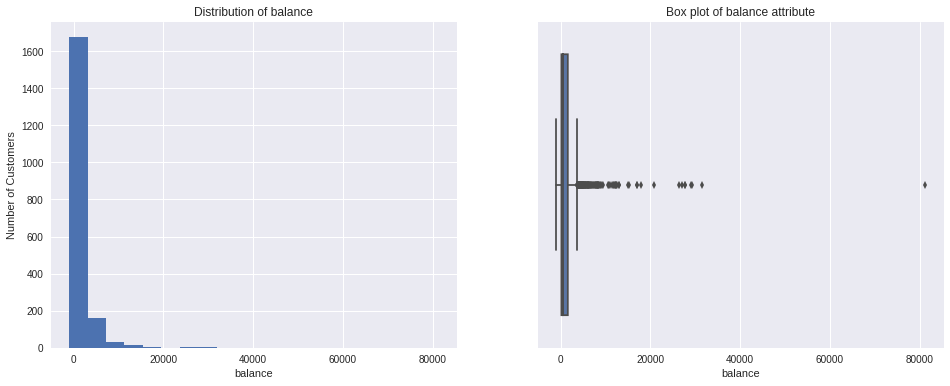

In [60]:
# Create two subplots for balance attribute
plt_fig = plt.figure(figsize=(16,6))

# Plot for balance
axis1 = plt_fig.add_subplot(1, 2, 1)
axis1.set_title("Distribution of balance")
axis1.set_xlabel('balance')
axis1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

axis2 = plt_fig.add_subplot(1, 2, 2)
sns.boxplot(x='balance', data=df, notch=True)
axis2.set_title("Box plot of balance attribute")

plt.show()

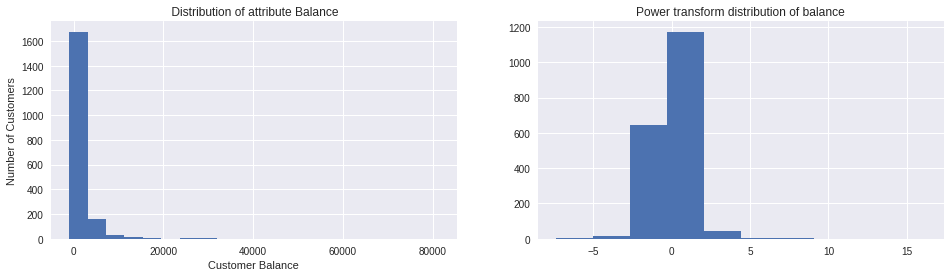

In [38]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot BALANCE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(" Distribution of attribute Balance")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Distrubtion of balance after appyling Power transform
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Power transform distribution of balance")

df['balance_power'].hist()
plt.show()

The histograms shows both balance_log have distribution closer to normal than the original feature balance


In [0]:
##We have to detect outlier option & found this wonderful video https://www.youtube.com/watch?v=nbNiD76yE8o
def outlier(data):
  #calculate balance mean & standard deviation 
  balance_mean, balance_std = np.mean(data), np.std(data)
  #IQR (3 times of the balance_std)
  IQR = balance_std * 3
  #calculate the outliers 
  Lower_outlier = balance_mean - IQR
  Upper_outlier = balance_mean - IQR
  #identify the outliers
  outliers = [x for x in data if x < Lower_outlier or x > Upper_outlier]
  return outliers

In [55]:
# Outlier detection:

# find outlier in BALANCE 
balance_outliers = outlier(df.balance)

print("Identified outliers BEFORE Log tranformation:", len(balance_outliers))
print("Identified outlier values:", balance_outliers)

Identified outliers BEFORE Log tranformation: 1891
Identified outlier values: [392, 688, 1035, 398, 1004, 926, 1924, 396, 315, 20727, 182, 4613, 508, 0, -30, 560, 1, 4348, 233, 0, 1409, 738, 1631, 489, -421, 136, 0, 496, 3187, 695, -60, 275, 3948, 517, 283, 3082, 292, 169, 8038, 71, 101, 2784, 225, 550, 2502, 14, 221, 1217, 266, 122, 72, 497, 635, 360, 1345, 2299, 0, 15341, 285, 1180, 1743, 0, 686, 3576, 1250, 2643, 1473, 168, 5452, 4867, 6, 1220, 1422, -53, 63, 262, 1664, 5000, 389, 144, 8626, 698, 1258, 1788, 3797, 3402, 67, 775, 0, 0, 393, 195, 596, 399, 1025, 782, 905, 1559, 2764, 3570, 623, 3519, 7546, 629, 2907, 3126, 1071, 265, 660, 294, 1130, 363, 349, 89, 1, -179, 129, 757, 218, 520, 5, 1097, 279, 367, 1222, 451, 3244, 1490, 207, -367, 506, 123, 430, 578, 221, 1103, 358, 97, -94, 514, 507, 614, 44, 289, 583, -271, 304, 447, 407, 778, 533, 659, 174, 478, -75, 51, 15, 798, 534, -196, 719, 442, 336, 8876, 5, 0, 10, 290, 621, 474, 504, 50, -145, 474, 174, 11, 359, 59, 303, 147, 63

In [56]:
# Outlier detection:

# find outlier in BALANCE 
balance_outliers = outlier(df.balance_power)

print("Identified outliers AFTER Log tranformation:", len(balance_outliers))
print("Identified outlier values:", balance_outliers)

Identified outliers AFTER Log tranformation: 1891
Identified outlier values: [-0.27811873977808443, -0.13572074166921788, 0.014833529116415185, -0.27503959706600944, 0.0018911387470773968, -0.031067620297239477, 0.35847663166271804, -0.2760648489913907, -0.3186208486062697, 5.203395700029793, -0.39435069203787043, 1.2363846195498542, -0.22021035718539328, -0.5340403659778217, -0.6342196226681304, -0.19521605910523948, -0.5323008079117607, 1.156251228452106, -0.3642294630711666, -0.5340403659778217, 0.16509032571172425, -0.11315451154220169, 0.25007070704003986, -0.2294797973302097, -2.979422719743389, -0.42314057009517736, -0.5340403659778217, -0.2260557783520333, 0.7912877921870246, -0.13254050940716952, -0.7645012148438933, -0.34049760653993705, 1.033237210790804, -0.2158460059223069, -0.33606978145935223, 0.7569665506789741, -0.33112084105731443, -0.4023078635783247, 2.2002365630011425, -0.4679377948098379, -0.44648583995542385, 0.658128735295226, -0.36885132805358994, -0.1999819964

## Observation on balance:
The outliers has big difference  before and after applying the log transformation. 